In [ ]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [ ]:
# resultado de nquad:

# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")

Resultado de la integral: -0.6500971589021813
Error estimado: 1.8391891749223705e-12


In [ ]:
# Procedimiento con quad #
integrand = lambda x, y, z, w: x + y + z + w

# limites de integracion #

a, b = 0, 1
c, d = lambda x: x**2, lambda x: x + 1
e, f = lambda x,y: y**2, lambda x,y: y + 2
g, h = lambda x,y,z: z**2, lambda x,y,z: z + 3

# funciones que utilizaremos para calcular la integral

def I_w(x,y,z):
  f_z = lambda w: integrand(x,y,z,w)
  return(quad(f_z, g(x,y,z), h(x,y,z)))[0]

def I_z(x,y):
  f_y = lambda z: I_w(x,y,z)
  return quad(f_y, e(x,y), f(x,y))[0]

def I_y(x):
  f_x = lambda y: I_z(x,y)
  return quad(f_x, c(x), d(x))[0]

# resultado de la integral

result_quad, error_quad = quad(I_y, a,b)

print(f"Resultado de la integral: {result_quad}")
print(f"Error estimado: {error_quad}")


# Error relativo #

print(f"""
Ahora, el error 'relativo'(no es relativo, caremonda) es de {abs(error_quad - error)}""")


Resultado de la integral: -0.6500971589021813
Error estimado: 1.5813253071872154e-13

Ahora, el error 'relativo'(no es relativo, caremonda) es de 0.0


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



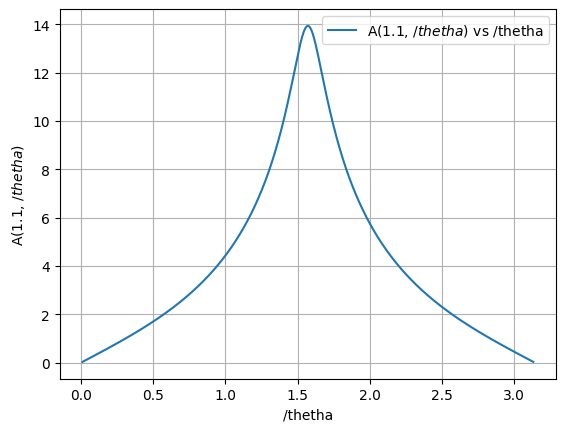

In [ ]:
# datos dados #

a = 1
I = 3
k = 1

k_2 = lambda r, thetha: (4*a*r*np.sin(thetha))/(a**2 + r**2 + 2*a*r*np.sin(thetha))

# a)
# datos dados #

r_a = 1.1

# linspace de thetha #
thetha_lin = np.linspace(0.01, np.pi- 1e-2, 1000)


# Aqui encontramos los valores de thetha
A = []
for i in thetha_lin:

  ks = k_2(r_a, i)
  Es = lambda phi: (1 - ks*(np.sin(phi)**2))**0.5
  Ks = lambda phi: 1/Es(phi)
  Ei = quad(Es, 0, np.pi/2)[0]
  Ki = quad(Ks, 0, np.pi/2)[0]
  Ai = k*((4*I*a)/((a**2 + r_a**2 + (2*r_a*a*np.sin(i)))**0.5))*(((2 - ks)*Ki - 2*Ei)/ks)
  A.append(Ai)

A = np.array(A)
plt.plot(thetha_lin, A, label = 'A(1.1, /$thetha$) vs /thetha')
plt.xlabel('/thetha')
plt.ylabel('A(1.1, /$thetha$)')
plt.legend()
plt.grid()
plt.show()


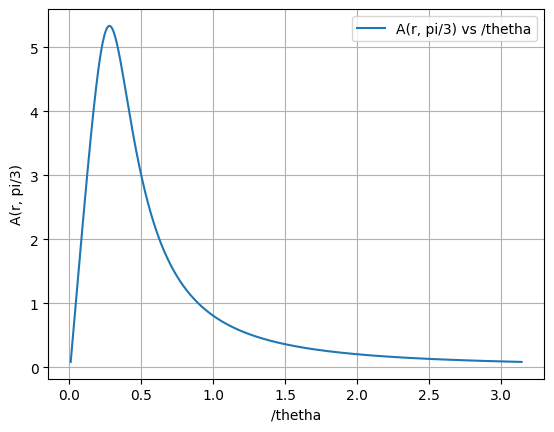

In [ ]:
# b)
# datos dados #

thetha_b = np.pi/3

# linspace de thetha #
r_lin = np.linspace(0.01, 10, 1000)


# Aqui encontramos los valores de thetha
A = []
for i in r_lin:

  ks = k_2(i, thetha_b)
  Es = lambda phi: (1 - ks*(np.sin(phi)**2))**0.5
  Ks = lambda phi: 1/Es(phi)
  Ei = quad(Es, 0, np.pi/2)[0]
  Ki = quad(Ks, 0, np.pi/2)[0]
  Ai = k*((4*I*a)/((a**2 + i**2 + (2*i*a*np.sin(thetha_b)))**0.5))*(((2 - ks)*Ki - 2*Ei)/ks)
  A.append(Ai)

A = np.array(A)
plt.plot(thetha_lin, A, label = 'A(r, pi/3) vs /thetha')
plt.xlabel('/thetha')
plt.ylabel('A(r, pi/3)')
plt.legend()
plt.grid()
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

[]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
converge despues de 5 iteraciones
El valor minimo es: 1.0000000008477385
El autovector asociado es: [-0.44720195  0.89443301]


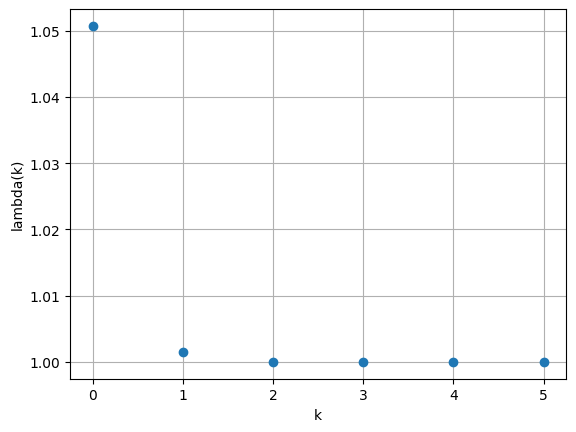

In [94]:
# matriz B
B = np.array([[5,2],
              [2,2]], dtype = float)

#a)
def potencia_inversa(A, tol = 1e-7, Nmax = 100):
  n = np.shape(A)[0]
  x = np.random.rand(n)
  valor0 = 0.0
  k_lin = []
  lambda_lin = []

  for k in range(Nmax):
    yk = np.linalg.solve(A, x)
    yk_n = np.linalg.norm(yk)
    xk = yk*(1/yk_n)
    p = xk.T@(A)@xk
    q = xk.T@xk
    valor = p/q
    lambda_lin.append(valor)
    #print(k_lin)
    k_lin.append(k)

    if np.max(np.abs(valor - valor0)) < tol:
      print(f"converge despues de {k} iteraciones")

      return valor, xk, lambda_lin, k_lin
    valor0 = valor
    x = xk

  print("no converge")
  return valor, xk, lambda_lin, k_lin


#b)
valor_min, eig, lambda_lin, k_lin = potencia_inversa(B)


print(f"El valor minimo es: {valor_min}")
print(f"El autovector asociado es: {eig}")

plt.plot(k_lin, lambda_lin, 'o')
plt.xlabel('k')
plt.ylabel('lambda(k)')
plt.grid()
plt.show()







In [101]:
# c)

valor_r, vector_r = np.linalg.eig(B)
print(f"""el error entre nuestro valor propio aproximado y np.linalg.eig(B)
es de {abs(valor_min-min(valor_r))}""")
print(f"""el error entre nuestro vector propio aproximado y np.linalg.eig(B)
es de {np.linalg.norm(eig-np.min(vector_r))}""")

el error entre nuestro valor propio aproximado y np.linalg.eig(B)
es de 8.477385460281539e-10
el error entre nuestro vector propio aproximado y np.linalg.eig(B)
es de 1.3416466096650594


#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [ ]:
# Matriz 5x5 aleatoria,

A = np.random.randint(-100,100,(5,5))
A

array([[  -4,   -3, -100,   57,   70],
       [ -49,   35,  -22,   39,   69],
       [   7,  -32,   72,    7,  -63],
       [  -3,   68,  -97,  -38,  -39],
       [ -26,   46,   45,  -98,   94]])

In [ ]:
# definimos n#
n = np.shape(A)[0]

# Autovalores #
eig = np.linalg.eig(A)[0]

# encontremos el determinante #

det = 1
for i in range(n):
  det *= eig[i]

# Valor del determinante #

print(f"El valor de el determinante de A es: {det}")

print(np.isclose(det, np.linalg.det(A)))

El valor de el determinante de A es: (604197276.0000027-0j)
True


In [ ]:
np.linalg.norm??